In [233]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1
import time
import cv2


import sys
from PIL import Image


In [234]:
def recolor(image, celor, lower_color, upper_color):
    
    img = image
    res = img.copy()
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    r2, g2, b2 = color(celor)

    mask = cv2.inRange(rgb, lower_color, upper_color)

    mask = mask/255
    mask = mask.astype(np.bool)
    res[:,:,:3][mask] = [b2, g2, r2] # opencv uses BGR
    im_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    return im_rgb

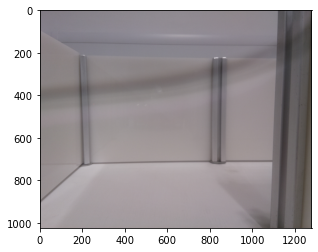

In [235]:
# read the image file
img = cv2.imread('1.jpg')
  
#ret, rgb_img = cv2.threshold(img, 135, 300, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(fixColor(img))
#plt.imshow(fixColor(gray))
  
# converting to its binary form
#bw = cv2.threshold(img, 185, 750, cv2.THRESH_BINARY)
  
# cv2.imshow("Binary", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [236]:
print(len(img), len(img[0]))

1024 1280


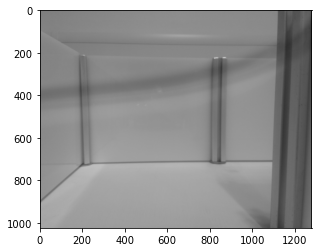

In [237]:
plt.imshow(fixColor(blurred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


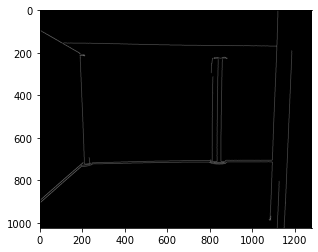

In [238]:
canny = cv2.Canny(blurred, 0, 70)
plt.imshow(fixColor(canny))
print(canny)

In [239]:
# canny_new = [[i if i == 0 else 255 for i in j] for j in canny]
# print(len(canny_new), len(canny_new[0]))
# count2 = 0
# for i in canny:
#     count = 0
#     #count2 = 0
#     print(i)
    
#     for j in i:
#         #print(j)
#         print(canny[count2][count])
#         if j == 0:
#             canny[count2][count] = 200
#             count = count + 1
#             if count > 5:  
#                 break;
#                 #print('This must be the wall')
#     count2 = count2+1
    
#plt.imshow(fixColor(canny_new))
# recolor(img, 'white', 0, 255)

In [248]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [252]:
coins = img.copy()
lol = cnts[17]
[lol]

[array([[[1119,    0]],
 
        [[1119,   35]],
 
        [[1118,   36]],
 
        ...,
 
        [[1118,   70]],
 
        [[1118,   36]],
 
        [[1119,   35]]], dtype=int32)]

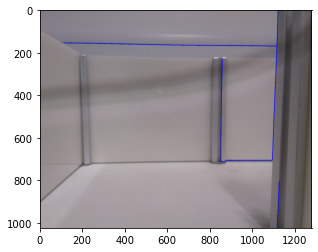

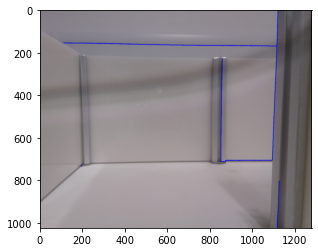

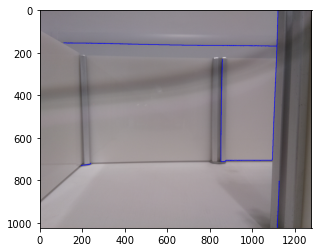

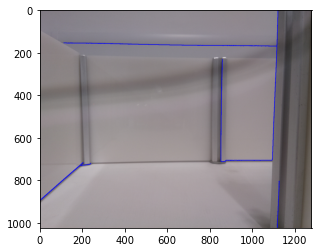

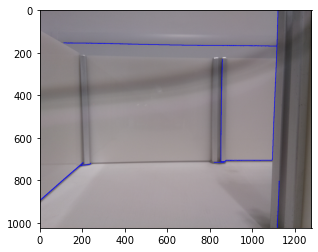

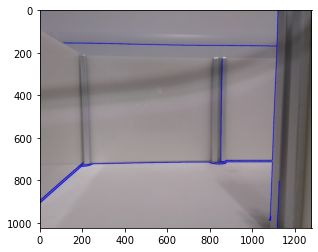

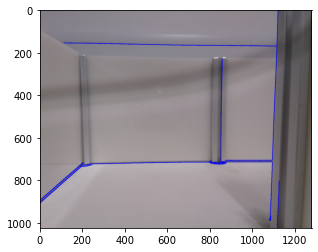

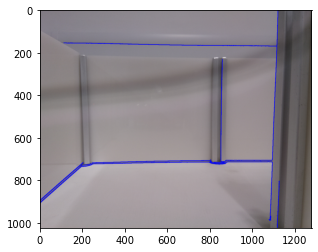

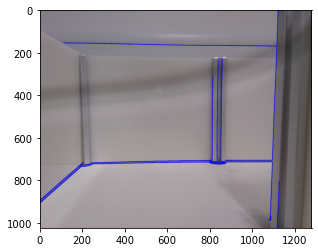

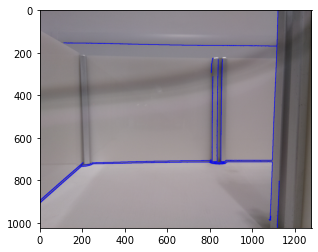

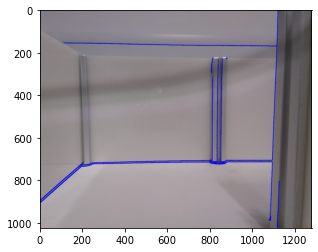

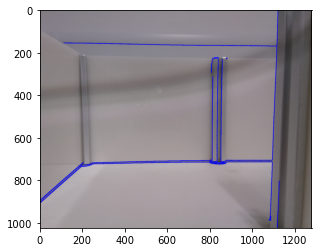

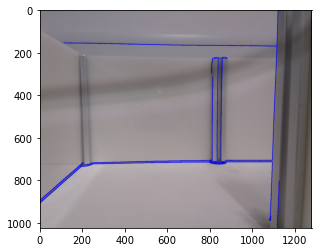

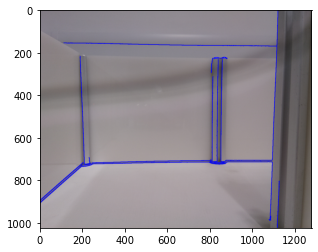

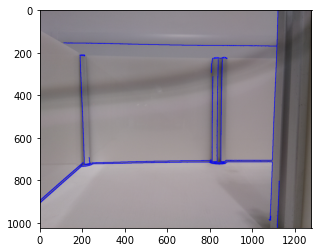

In [256]:
for i in range(0,15):
    cv2.drawContours(coins, [cnts[i]], 0,(255, 0, 0), 2)
    plt.imshow(fixColor(coins))
    plt.pause(1)
    

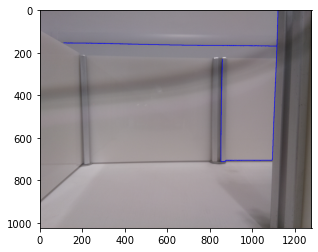

In [251]:
plt.imshow(fixColor(coins))


In [182]:
# print(coins)

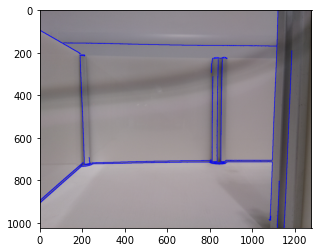

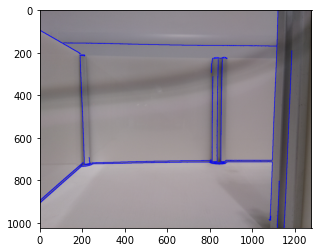

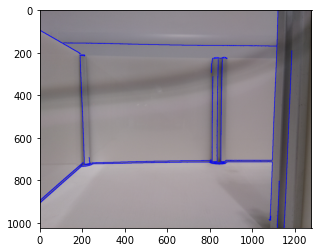

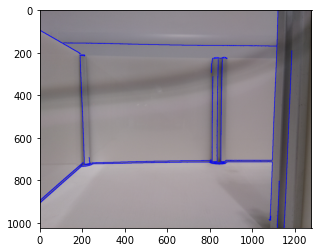

6


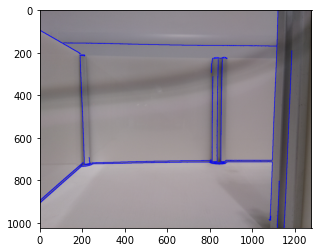

7


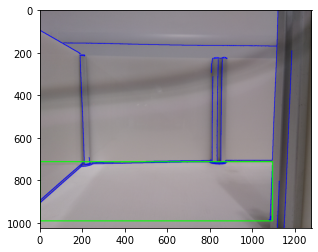

8


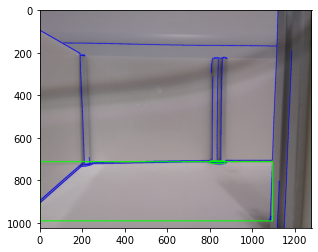

9


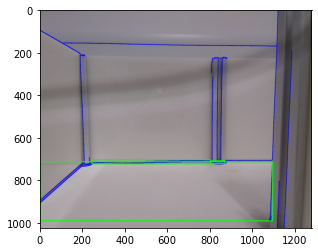

10


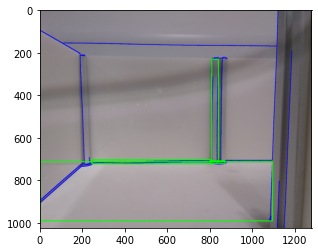

11


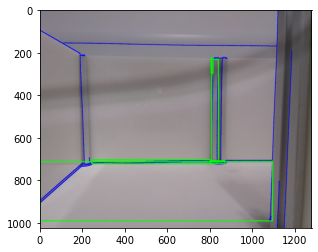

12


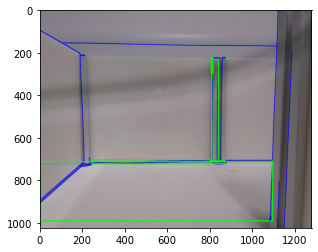

13


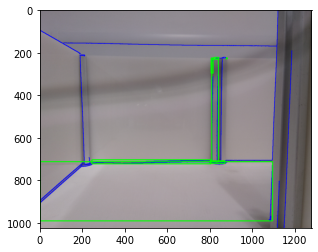

14


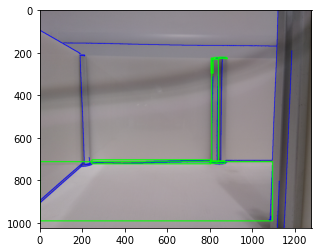

15


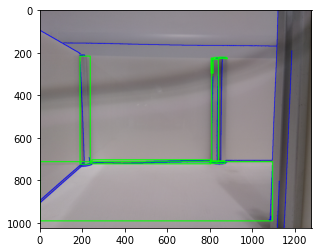

16


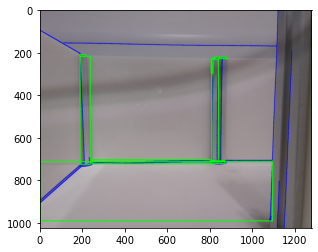

17


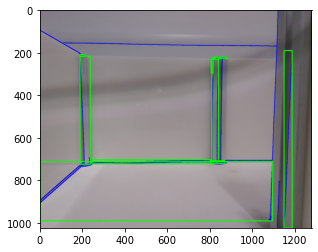

18


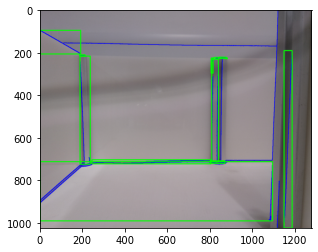

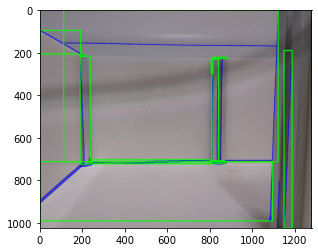

In [56]:
count = 0
for cnt in cnts:
    #print(cnt)
    count = count +1;
    if count > 5:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(coins,(x,y),(x+w,y+h),(0,255,0),3)
        print(count)
    #time.sleep(5)
    plt.pause(1)
    plt.imshow(fixColor(coins))
    #print(cnt)
#plt.imshow(fixColor(coins))